# Lets explore this dataset first
## data is courtesy of metal-archives.com

In [1]:
#packages
import pandas as pd
import numpy as np
import datetime as dt

df = pd.read_csv('Data/band_20220130.csv')

In [4]:
df.describe()

,Band,Genre,Location,Years active
count,33859,33859,32869,23703
unique,31132,3589,6101,6006
top,Necropolis,Black Metal,"Los Angeles, California",2012-Present
freq,14,2927,1081,665


In [5]:
df.head()

,Band,Genre,Location,Years active
0,۞,Black Metal,NaN,NaN
1,...and Here I Lie,Death/Doom Metal,"Holley, New York","1994-2000, 2007-2007"
2,...and They Will Meet God,Melodic Death Metal/Crossover,"Palestine, Texas",2002-?
3,...in Agony of the Eclipsed Moon,Black Metal/Dark Ambient,"Midland City, Alabama",NaN
4,...Under a Full Moon,Black/Doom Metal,"Midland, Michigan (early); North Carolina / No...","2016-2017 (as Disrhythmia), 2017-Present"


So it looks like four columns, location can be a bit tricky since its comma deliminited several times possibly. Also Years active is the same way and includes the other band. Going to do some definite parsing here for this..

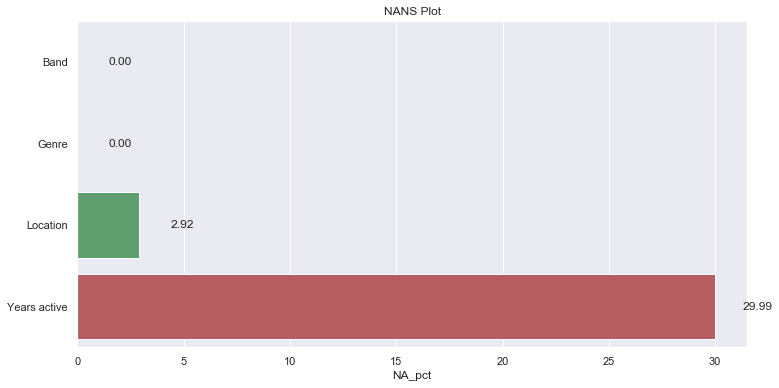

In [45]:
#looks like some NANs
#build pretty NAN function keep for later
def get_nans(dataframe,plot=False):
    '''
    gives a dataframe and returns a dataframe which counts number of NANs per column
    and the pct of total records. can return dataframe OR a plot use seaborn and matplot
    
        
    '''
    if plot == False:
        nans_count = dataframe.isna().sum()
        dataframe_len = len(dataframe)
        nan_df = pd.DataFrame(nans_count, columns = ['NA_Count'])
        nan_df['NA_pct'] = (nan_df['NA_Count']/dataframe_len)*100
        #simply returns the dataframe which is still nice
        return nan_df
    else:
        import seaborn as sns
        import matplotlib.pyplot as plt
        
        nans_count = dataframe.isna().sum()
        dataframe_len = len(dataframe)
        nan_df = pd.DataFrame(nans_count, columns = ['NA_Count'])
        nan_df['NA_pct'] = (nan_df['NA_Count']/dataframe_len)*100
        
        sns.set_theme(style="darkgrid")
        plt.figure(figsize=(12, 6))
        plots = sns.barplot(data = nan_df, x = 'NA_pct', y = nan_df.index)
        #would like to have a future improvement where this annotates the count and the percentage
        for bar in plots.patches:
            width = bar.get_width()
            plt.text(2+bar.get_width(), bar.get_y()+0.5*bar.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
        plt.title('NANS Plot')
        #returns the dataframe
        return plt.show()


get_nans(df,plot = True)

so years active as almost 30% of the records being NA, so i might have to drop those, in addition although a mere 2.92% of the location is not blank i possibly may need to drop these too. I'll do that in seperate notebook. i'm thinking its best to maybe look at most popular genre groupings

In [85]:
#build pretty function for unique counts

def get_unique_col_vals(dataframe,column, plot = False, pct = True,plot_cutoff = 10):
    '''
    accepts only dataframes. will return dataframe of unique counts of specific row
    will also plot the values if specified
    since there is a possibilty of gettings a 
    
    '''
    if plot == False:
        unique_cols = dataframe.groupby(column)[column].agg(['count']).reset_index().sort_values('count',ascending = False) 
        unique_cols['Pct_tot'] = 100*unique_cols['count']/unique_cols['count'].sum()
        #returns dataframe with count and pct of total 
        return unique_cols
    else:
        import seaborn as sns
        import matplotlib.pyplot as plt
        
        unique_cols = dataframe.groupby(column)[column].agg(['count']).reset_index().sort_values('count',ascending = False) 
        unique_cols['Pct_tot'] = 100*unique_cols['count']/unique_cols['count'].sum()
        cutoff = unique_cols.iloc[0:plot_cutoff,].reset_index(drop = True)
        remaining = unique_cols.iloc[plot_cutoff:len(unique_cols),]
                
        return cutoff


    
    
test_ = get_unique_col_vals(df,'Genre',plot=True)

test_

33859
33859


,Genre,count,Pct_tot
0,Black Metal,2927,8.644673
1,Death Metal,2753,8.130778
2,Thrash Metal,2014,5.948197
3,Heavy Metal,1951,5.762131
4,Death/Thrash Metal,704,2.079211
5,Black/Death Metal,693,2.046723
6,Brutal Death Metal,662,1.955167
7,Melodic Death Metal,629,1.857704
8,Progressive Metal,611,1.804542
9,Death Metal/Grindcore,553,1.633244
